In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
data = pd.read_csv('mobile_data.csv')
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           828 non-null    object 
 1   Rating          828 non-null    float64
 2   Reviews         522 non-null    float64
 3   Discount Price  279 non-null    float64
 4   Original Price  826 non-null    float64
 5   Off             279 non-null    object 
dtypes: float64(4), object(2)
memory usage: 38.9+ KB


In [3]:
data.isnull().sum()

Title               0
Rating              0
Reviews           306
Discount Price    549
Original Price      2
Off               549
dtype: int64

In [4]:
data = data.dropna(subset=['Rating', 'Reviews'], how='any')  # Drop rows with missing Rating or Reviews


In [5]:
data

,Title,Rating,Reviews,Discount Price,Original Price,Off
0,Tecno Spark 30,3.3,1.0,36899.0,39999.0,8%
1,Nokia 105 Classic,5.0,67.0,3749.0,4199.0,11%
2,Infinix Note 40,2.1,189.0,48999.0,57999.0,16%
3,Jazz Digit E2 Pro 4G,4.0,132.0,6199.0,9499.0,35%
4,Xiaomi Redmi Note 13,1.3,425.0,42999.0,52999.0,19%
...,...,...,...,...,...,...
773,Itel Power 900,5.0,1.0,NaN,5099.0,NaN
774,GFive Disco,2.8,1.0,NaN,3199.0,NaN
775,GFive Spark,3.9,3.0,NaN,2325.0,NaN
781,VNUS Boss 1,2.0,6.0,NaN,3099.0,NaN


In [6]:
data.isnull().sum()

Title               0
Rating              0
Reviews             0
Discount Price    307
Original Price      0
Off               307
dtype: int64

In [7]:
data['Discount Price'].fillna(0, inplace=True)  
data['Off'].fillna(0, inplace=True)  


C:\Users\sehri\AppData\Local\Temp\ipykernel_18192\4091273412.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Discount Price'].fillna(0, inplace=True)
C:\Users\sehri\AppData\Local\Temp\ipykernel_18192\4091273412.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [8]:
data.isnull().sum()

Title             0
Rating            0
Reviews           0
Discount Price    0
Original Price    0
Off               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 0 to 787
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           522 non-null    object 
 1   Rating          522 non-null    float64
 2   Reviews         522 non-null    float64
 3   Discount Price  522 non-null    float64
 4   Original Price  522 non-null    float64
 5   Off             522 non-null    object 
dtypes: float64(4), object(2)
memory usage: 28.5+ KB


In [10]:
data.isnull().sum()

Title             0
Rating            0
Reviews           0
Discount Price    0
Original Price    0
Off               0
dtype: int64

In [11]:
def map_sentiment(rating):
    if rating >= 3.8:  # Positive sentiment
        return 'positive'
    elif rating >= 2.4:  # Neutral sentiment
        return 'neutral'
    else:  # Negative sentiment
        return 'negative'

data['Sentiment'] = data['Rating'].apply(map_sentiment)
data[['Rating', 'Sentiment']]
data


,Title,Rating,Reviews,Discount Price,Original Price,Off,Sentiment
0,Tecno Spark 30,3.3,1.0,36899.0,39999.0,8%,neutral
1,Nokia 105 Classic,5.0,67.0,3749.0,4199.0,11%,positive
2,Infinix Note 40,2.1,189.0,48999.0,57999.0,16%,negative
3,Jazz Digit E2 Pro 4G,4.0,132.0,6199.0,9499.0,35%,positive
4,Xiaomi Redmi Note 13,1.3,425.0,42999.0,52999.0,19%,negative
...,...,...,...,...,...,...,...
773,Itel Power 900,5.0,1.0,0.0,5099.0,0,positive
774,GFive Disco,2.8,1.0,0.0,3199.0,0,neutral
775,GFive Spark,3.9,3.0,0.0,2325.0,0,positive
781,VNUS Boss 1,2.0,6.0,0.0,3099.0,0,negative


In [167]:
# Get unique values of ratings
data['Rating'].unique()

# Get unique values of sentiments
# data['Sentiment'].unique()

array([3.3, 5. , 2.1, 4. , 1.3, 2.4, 2.8, 3.4, 1.2, 4.6, 2.9, 2. , 1.9,
       4.9, 4.2, 1.4, 1.1, 2.6, 2.2, 4.7, 1.7, 4.3, 2.5, 2.3, 3.9, 3.1,
       1.8, 3. , 3.5, 3.2, 2.7, 4.4, 3.6, 1. , 1.6, 4.8, 4.5, 3.8, 4.1,
       1.5, 3.7])

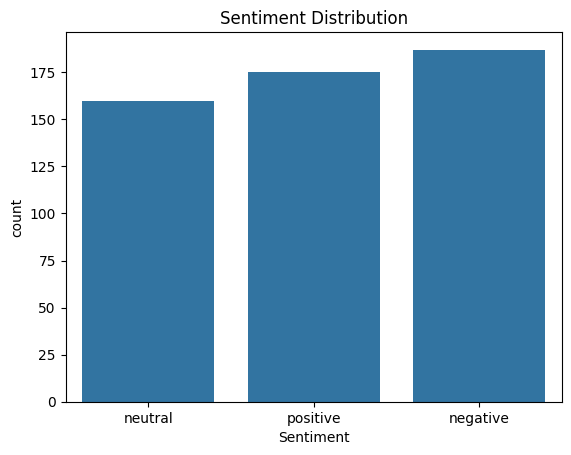

In [168]:
# Count plot for Sentiment distribution
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()


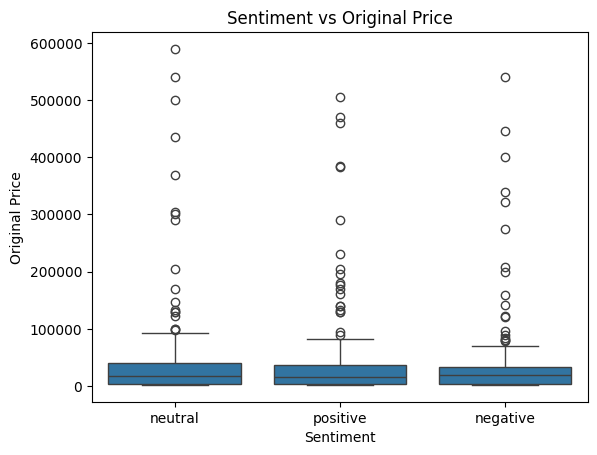

In [169]:
# Sentiment vs Original Price
sns.boxplot(x='Sentiment', y='Original Price', data=data)
plt.title('Sentiment vs Original Price')
plt.show()




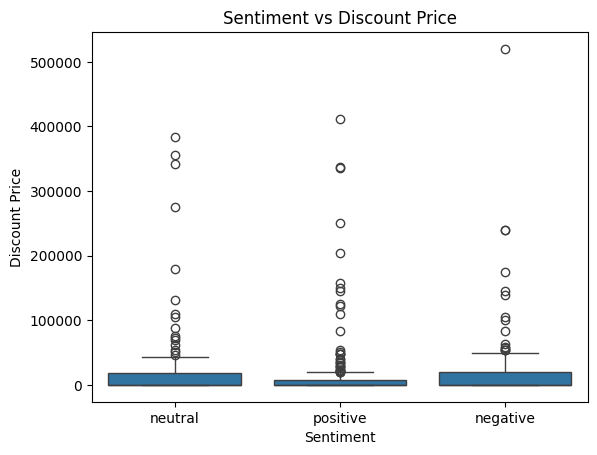

In [170]:
# Sentiment vs Discount Price
sns.boxplot(x='Sentiment', y='Discount Price', data=data)
plt.title('Sentiment vs Discount Price')
plt.show()

In [171]:
# Select features and target
X = data[['Rating', 'Discount Price', 'Original Price']]
y = data['Sentiment']


In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [174]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [175]:
# Make predictions
y_pred = model.predict(X_test)

In [176]:
# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        75
     neutral       0.98      1.00      0.99        58
    positive       1.00      0.99      0.99        76

    accuracy                           1.00       209
   macro avg       0.99      1.00      0.99       209
weighted avg       1.00      1.00      1.00       209



In [180]:
# Check the model's accuracy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming you have your true labels and predicted labels
y_true = [0, 1, 1, 0, 1]  # Example true labels
y_pred = [0, 0, 1, 0, 1]  # Example predicted labels

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)
# accuracy = f1_score(y_test, y_pred)
# accuracy = precision_score(y_test, y_pred)
# accuracy = recall_score(y_test, y_pred)

print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 80.00%
